## TapDanceDecoder: MVP 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [3]:
train = pd.read_csv('../../../Source/Data/audio_data.csv')
test = pd.read_csv('../../../Source/Data/youtube_data.csv')

In [33]:
train.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,BPM,ZCR,RMSE,STE
0,../../../Source/Clean_train_clips/Shuffle/1/1.wav,1,-152.435155,78.311769,-106.482258,40.668131,-6.848575,-13.537377,-25.102485,6.754208,...,-10.265548,-2.854873,-2.821410,-11.892168,-1.505338,-2.087528,258.398438,0.183553,0.113765,3.927907
1,../../../Source/Clean_train_clips/Shuffle/1/10...,1,-143.991075,65.523449,-102.436753,32.133732,-7.930019,-3.615873,-29.871724,-0.182348,...,-13.680871,-0.441789,-5.826206,-15.578982,-4.161982,-2.657234,215.332031,0.187988,0.105637,3.369918
2,../../../Source/Clean_train_clips/Shuffle/1/11...,1,-129.072670,59.774233,-97.656748,35.739948,-4.885226,-0.900206,-23.750029,-4.998659,...,-14.757999,-2.040899,-4.384916,-20.807594,-8.360181,-2.981402,234.907670,0.201621,0.082684,1.902416
3,../../../Source/Clean_train_clips/Shuffle/1/12...,1,-157.448416,71.945819,-105.594077,33.904608,-1.771036,-8.738653,-30.610143,1.405105,...,-14.136805,-4.416947,-4.629338,-16.549472,-3.571637,-3.324539,215.332031,0.185764,0.094802,2.716855
4,../../../Source/Clean_train_clips/Shuffle/1/13...,1,-182.069789,83.063060,-97.683985,32.842908,3.010242,5.194879,-24.979170,0.772903,...,-13.376806,-5.384937,-2.593670,-19.554310,-7.848034,-1.967332,184.570312,0.180020,0.068570,1.398406


In [34]:
test.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,BPM,ZCR,RMSE,STE
0,../../../Source/Shuffle/1/1.wav,1,-397.996291,69.919217,-30.816585,2.052624,-4.498367,3.586868,1.112511,-0.931258,...,-5.293024,0.152664,-3.874195,2.935363,-2.040664,0.617618,258.398438,0.181868,0.004159,0.008354
1,../../../Source/Shuffle/1/2.wav,1,-380.969173,68.260789,-36.607765,5.305637,-5.950456,2.665462,3.021190,-3.789654,...,-5.927427,-0.186541,-4.511462,1.920166,-2.233199,1.871566,215.332031,0.186700,0.005309,0.014077
2,../../../Source/Shuffle/1/3.wav,1,-379.707155,71.743598,-38.705834,4.732883,-3.484858,2.979705,2.399476,-3.935687,...,-5.749561,-0.498359,-4.594561,1.812919,-2.993126,1.252439,172.265625,0.176909,0.004938,0.011588
3,../../../Source/Shuffle/2/1.wav,1,-365.681881,112.207218,-44.156703,28.384908,5.436029,10.016629,-1.238957,6.827234,...,-3.921688,1.802320,-6.703229,-1.233793,-6.914826,2.094775,234.907670,0.120793,0.012703,0.104904
4,../../../Source/Shuffle/3/1.wav,1,-140.521704,26.983688,-72.189903,16.219018,-55.419643,15.687635,-15.282690,3.851774,...,-6.116531,5.181411,3.371878,6.317297,-1.877233,3.540987,99.384014,0.286321,0.065943,1.549808


## Split into inputs and targets

In [37]:
#X_train = train.iloc[:,2:].values
X_train = train[['BPM', 'ZCR', 'RMSE', 'STE']]
y_train = train['Labels']

#X_test = test.iloc[:,2:].values
X_test = test[['BPM', 'ZCR', 'RMSE', 'STE']]
y_test = test['Labels']

## Logistic Regression

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [40]:
results = pd.DataFrame()
results['True'] = y_test.values
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [41]:
results

,True,Predict_lr,Prob_0_lr
0,1,1,0.198457
1,1,1,0.262722
2,1,1,0.338086
3,1,1,0.235340
4,1,0,0.595353
5,1,1,0.205950
6,1,1,0.166927
7,0,1,0.263307
8,0,1,0.290707
9,0,1,0.316304


In [42]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.5


### Visualizing results

In [43]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

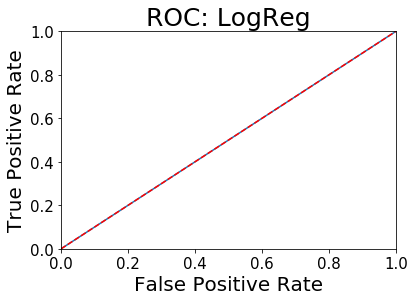

ROC_AUC_Score: 0.5


In [44]:
ROC_plot('LogReg',  y_test.values, predict )

## Random Forest 

In [62]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16) 
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [64]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [65]:
results

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
0,1,1,0.198457,0,0.502745
1,1,1,0.262722,1,0.393355
2,1,1,0.338086,1,0.498827
3,1,1,0.235340,1,0.273342
4,1,0,0.595353,0,0.715468
5,1,1,0.205950,1,0.243987
6,1,1,0.166927,1,0.238987
7,0,1,0.263307,1,0.437549
8,0,1,0.290707,0,0.546752
9,0,1,0.316304,0,0.511842


In [66]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.5714285714285714


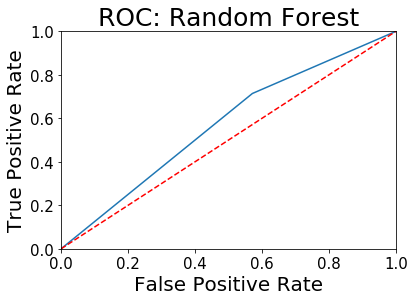

ROC_AUC_Score: 0.5714285714285715


In [67]:
ROC_plot('Random Forest', y_test.values, predict_rf)

In [ ]:
#results.to_csv('../../Source/Data/Train_results_n40.csv', index=None)

Minimal improvement when using only a few features with RF clf

### What if the model is trained and tested on a combination of the two sources (audio&video) data?

In [117]:
data = pd.concat([train, test], axis=0)
data = data.sample(frac=1)

In [118]:
X = data.iloc[:,2:].values
y = data['Labels']
#X = data[['BPM', 'ZCR', 'RMSE', 'STE']]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20)

### Logistic Regression

In [120]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [122]:
print('Accuracy score (LogReg): ' + str(accuracy_score(y_test, predict)))

Accuracy score (LogReg): 0.8181818181818182


### Random Forest

In [123]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16) 
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [125]:
print('Accuracy score (RF): ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score (RF): 0.9242424242424242


That method performs considerably better!